# Naive Bayes Gaussian (Heart Attack Prediction)

## Explanation

### Objective

Create a machine learning model that can predict whether a patient is suffering heart attack or not, using the Naive Bayes Gaussian algorithm.

### Column Descriptions

- ***Age*** = The age of the individual.
- ***Sex*** = The gender of the individual.
- ***Chest Pain Type*** = The type of chest pain experienced by the individual.
- ***Resting Blood Pressure*** = The resting blood pressure of the individual (in mm Hg).
- ***Cholesterol*** = The cholesterol levels of the individual (in mg/dL).
- ***Fasting Blood Sugar*** = The fasting blood sugar level of the individual (> 120 mg/dL is considered high).
- ***Resting Electrocardiographic Results (ECG)*** = Results of the resting electrocardiogram.
- ***Maximum Heart Rate Achieved*** = The maximum heart rate achieved by the individual during exercise.
- ***Exercise Induced Angina*** = Whether the individual experienced angina during exercise.
- ***ST Depression Induced by Exercise*** = The ST depression induced by exercise relative to rest.
- ***Slope of the Peak Exercise ST Segment*** = The slope of the peak exercise ST segment.
- ***Number of Major Vessels Colored by Fluoroscopy*** = The number of major blood vessels colored by fluoroscopy.
- ***Thalassemia*** = A blood disorder; different types of thalassemia might be represented in the dataset.
- ***Target*** = Whether the individual had a heart attack or not (typically represented as binary = 0 for no heart attack, 1 for heart attack).

## A. Data Preparation

### A.1 Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [3]:
try:
    df = pd.read_csv("heart.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [4]:
df.shape

(303, 14)

### A.4 Viewing Data Informations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### A.5 Viewing Data Statistics

In [6]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trtbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalachh,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exng,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### A.7 Viewing Duplicated Data

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)

### A.8 Viewing Missing Data

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### A.9 Viewing Outlier Data

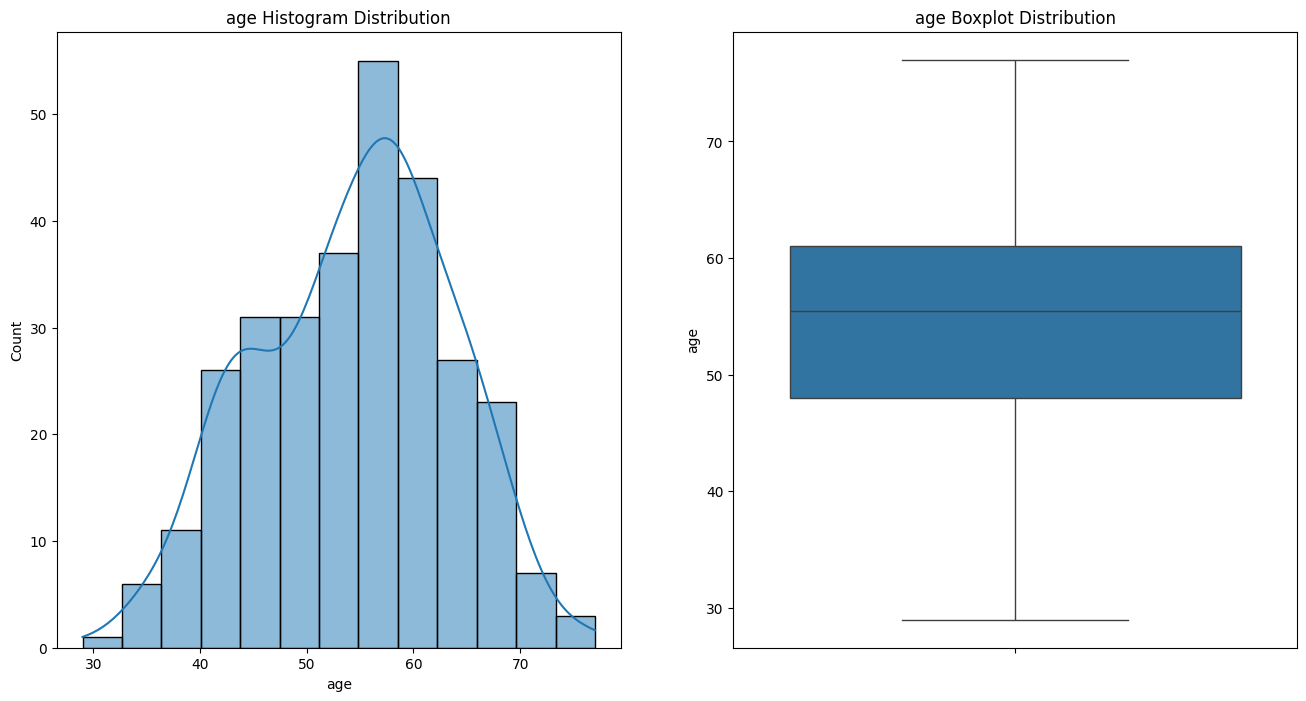

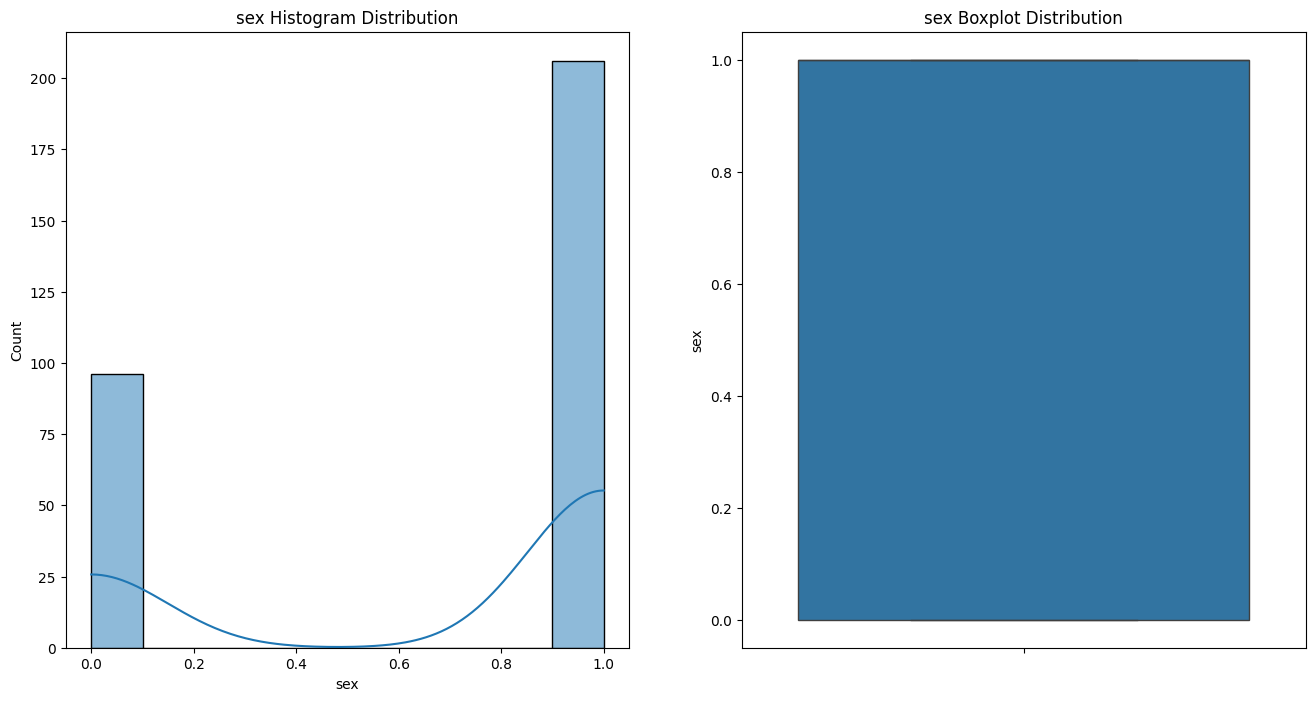

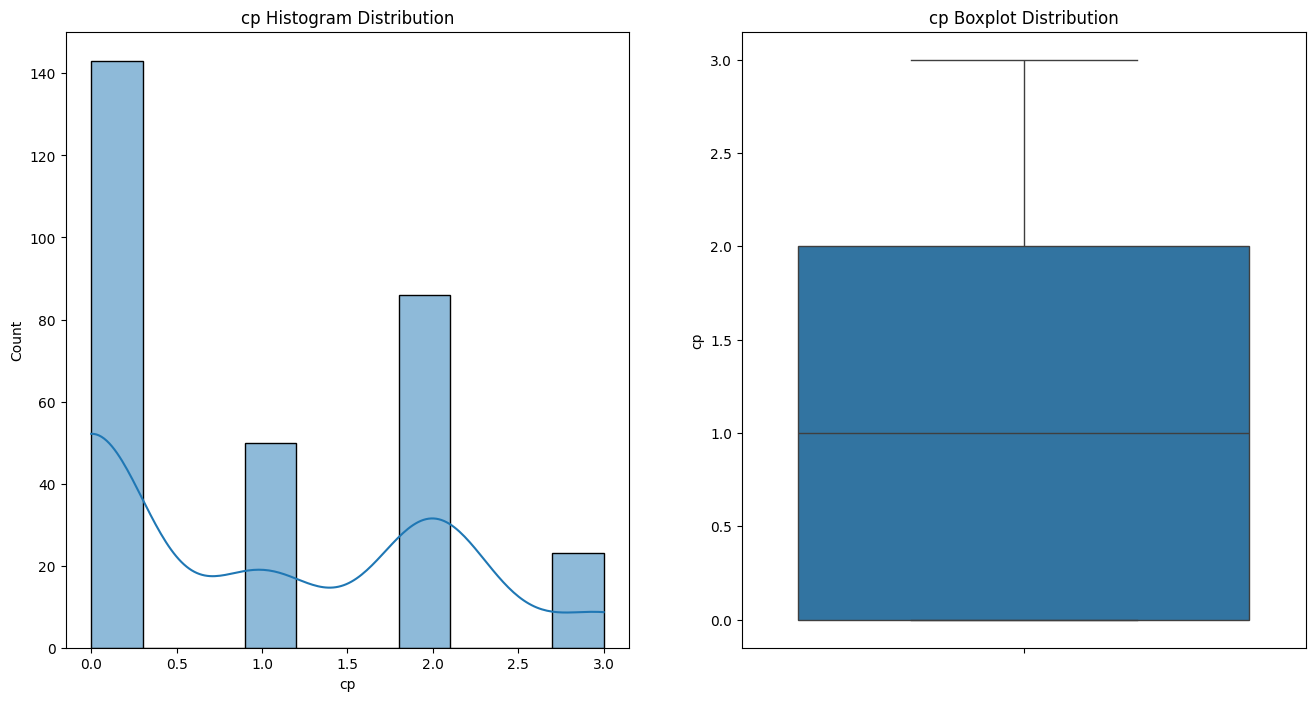

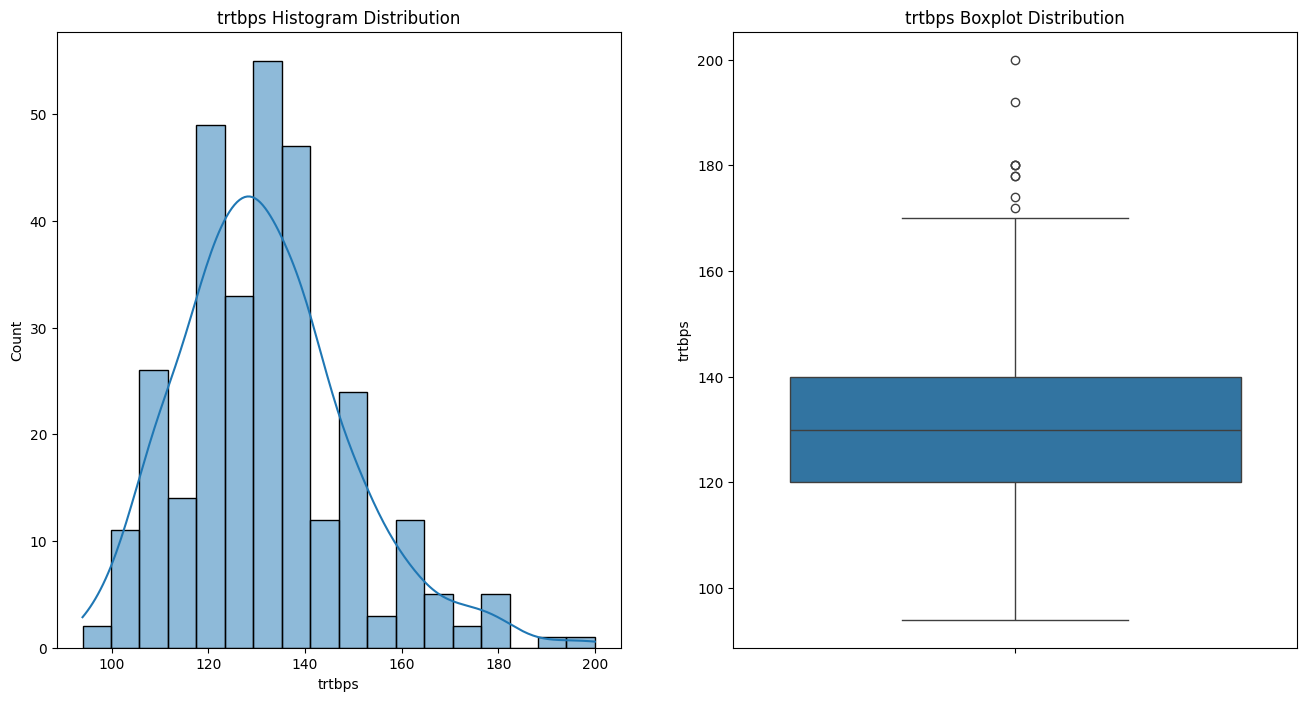

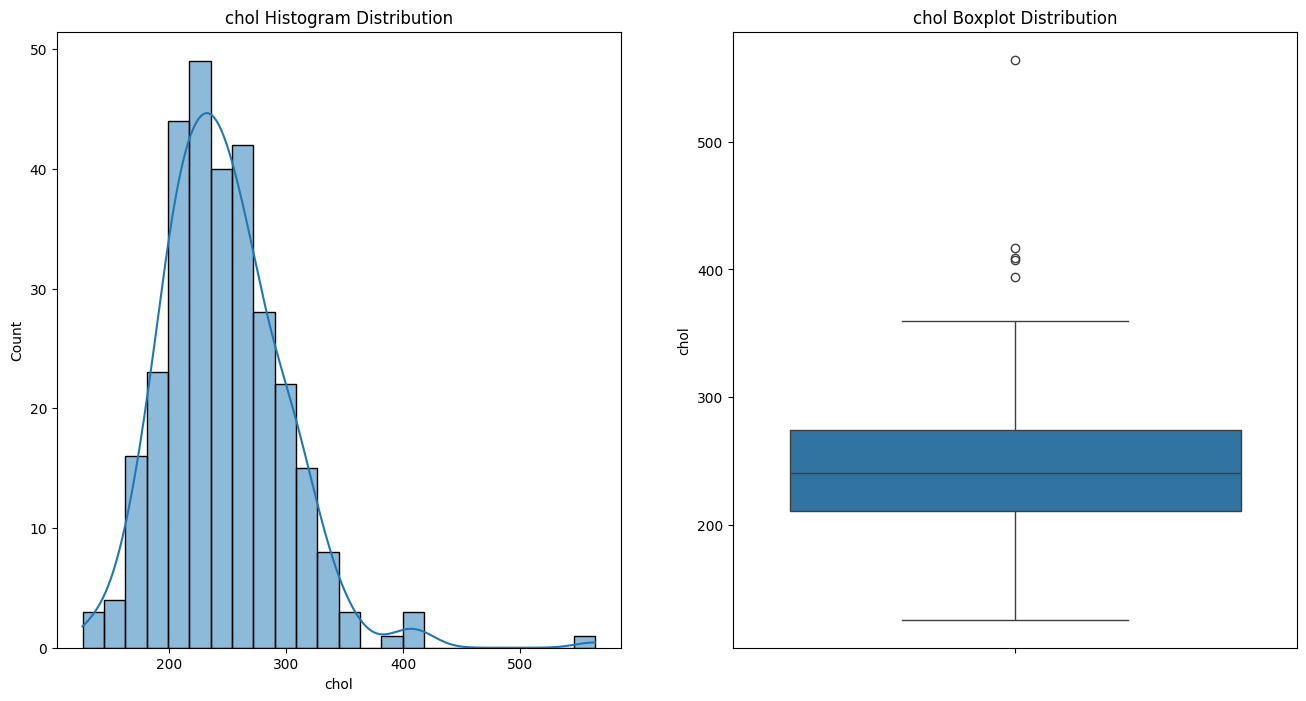

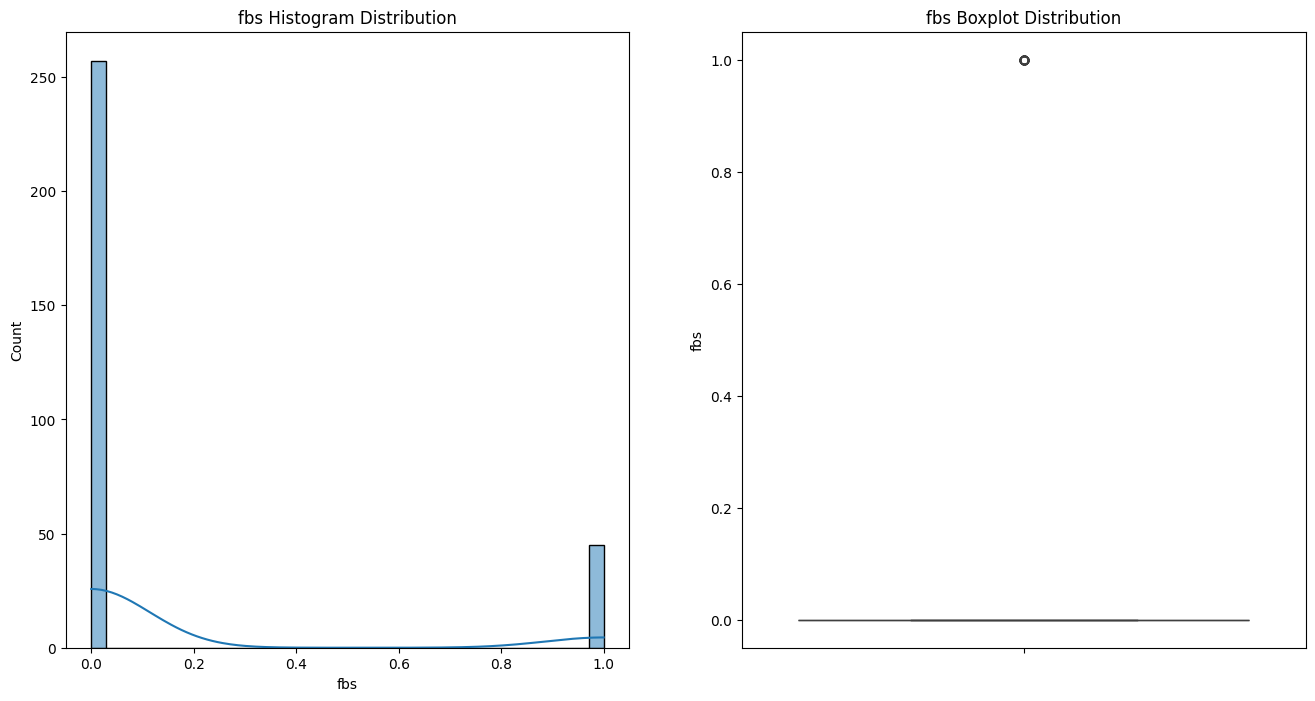

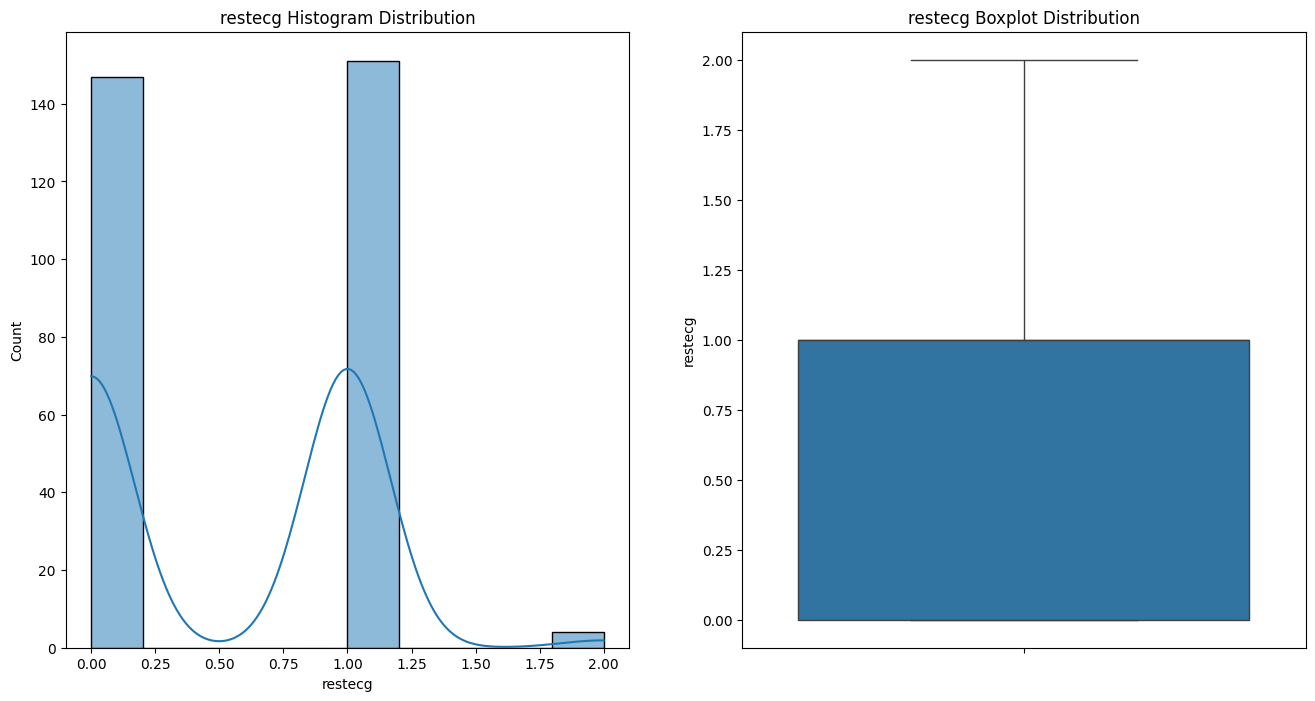

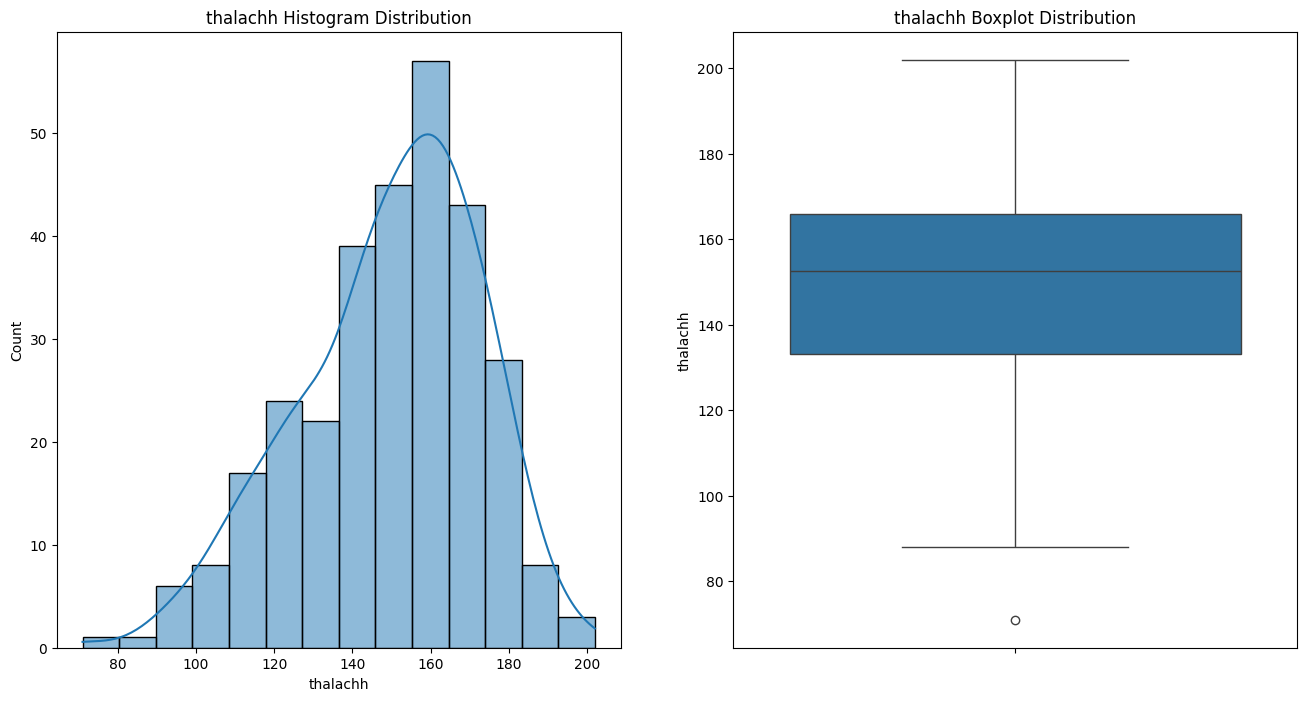

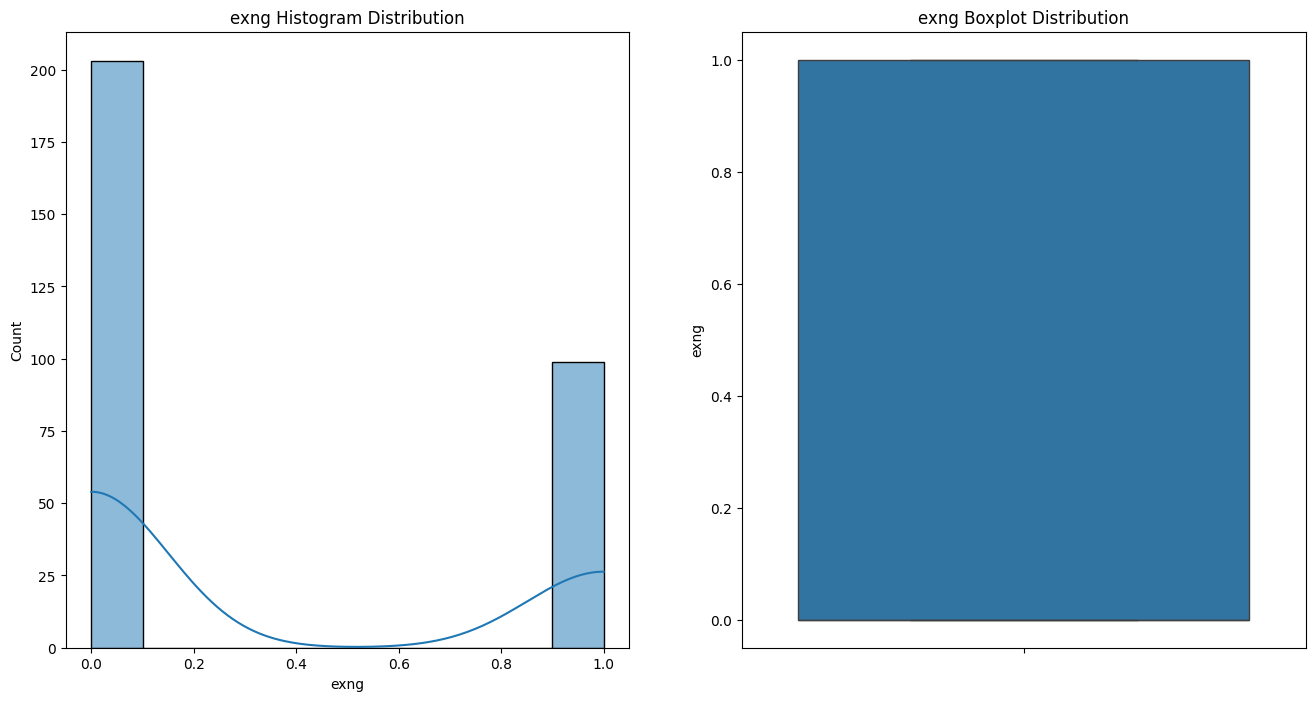

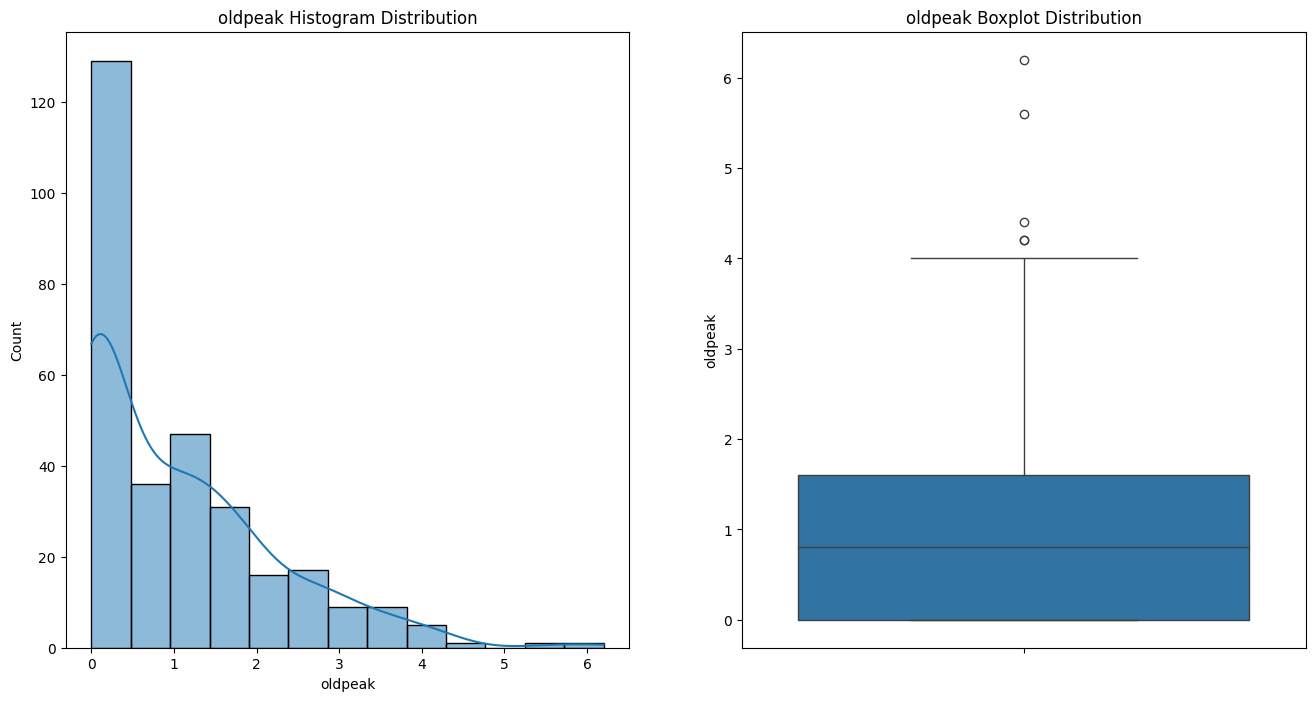

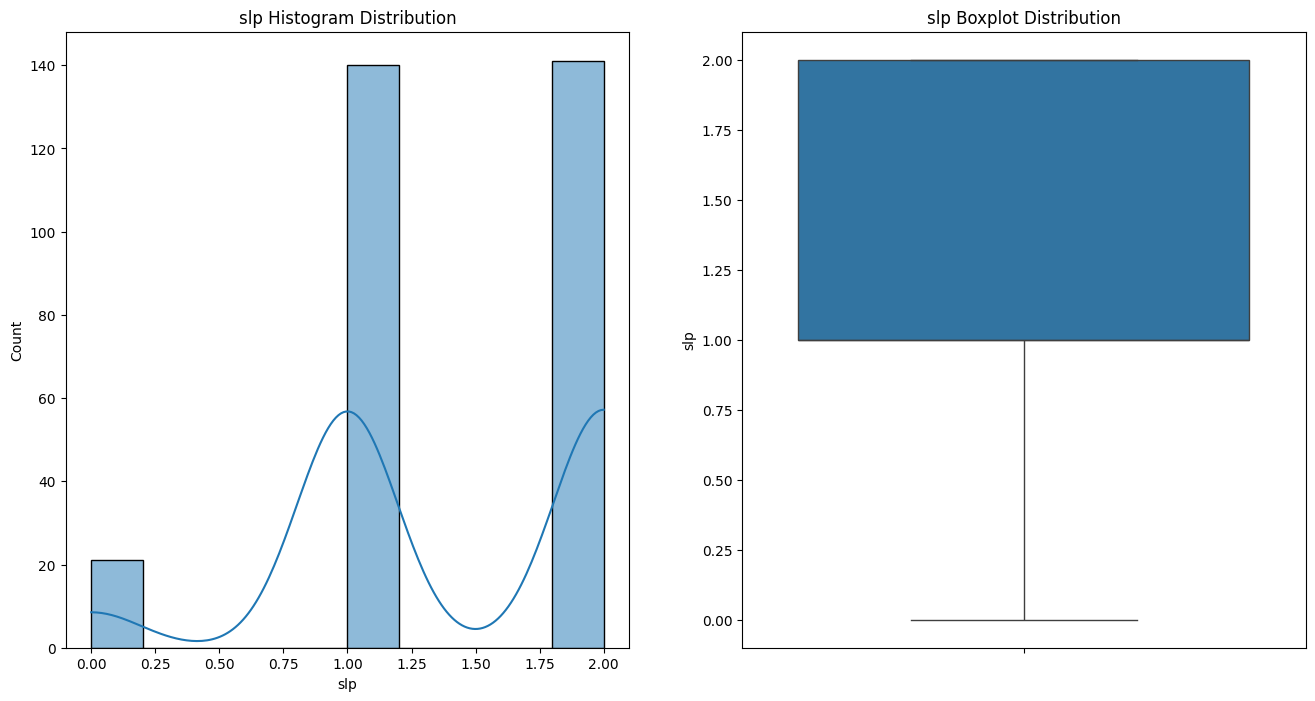

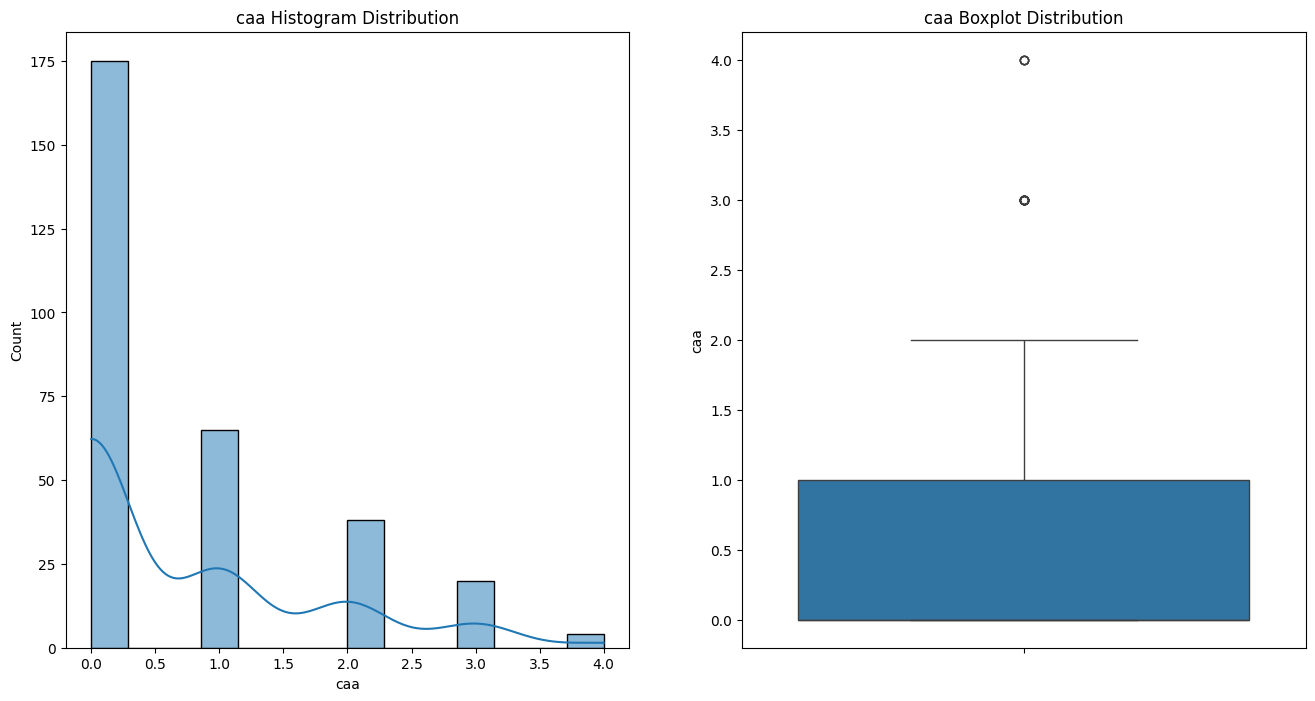

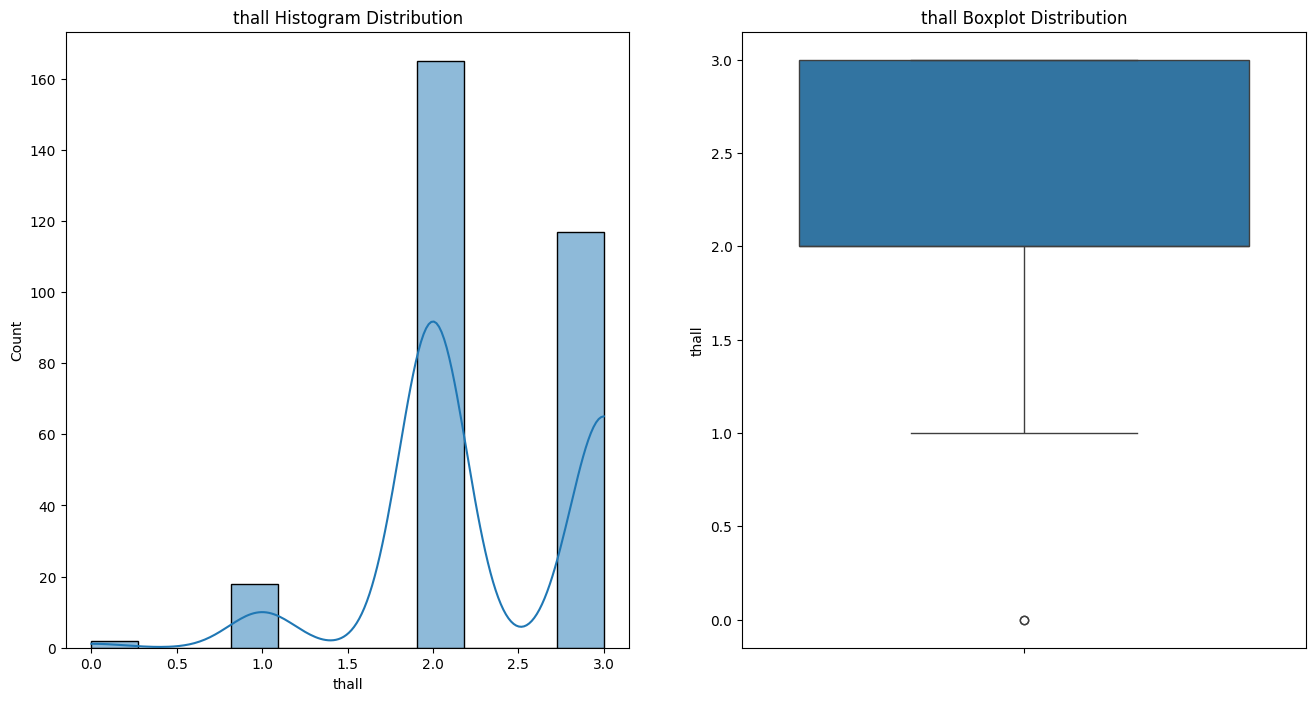

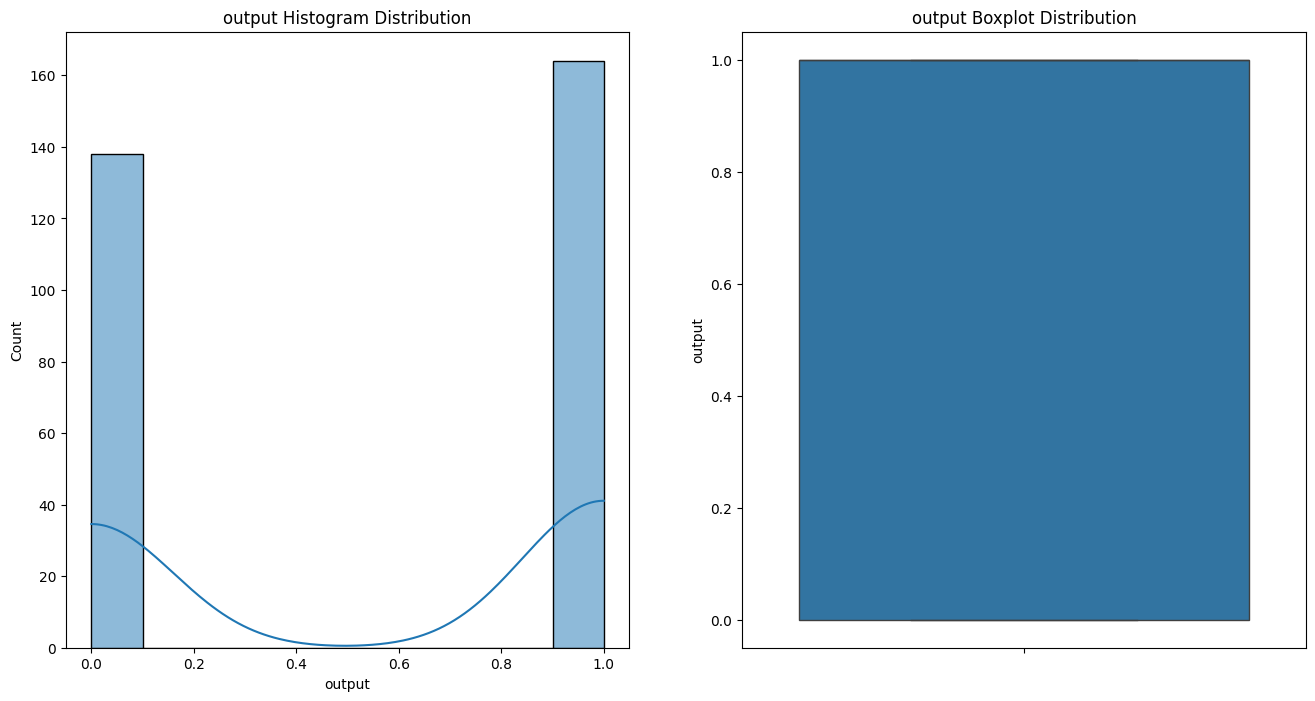

In [12]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"{col} Histogram Distribution")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"{col} Boxplot Distribution")

## B. Data Preprocessing

### B.1 Mapping Label

In [17]:
output_name = {0 : "Negative", 1 : "Positive"}
df['output_sign'] = df['output'].map(output_name)

## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Label Distribution

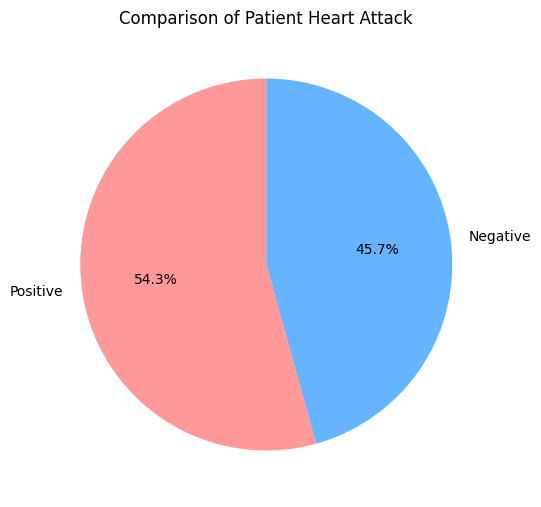

In [21]:
plt.figure(figsize=(6, 8))
df['output_sign'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Comparison of Patient Heart Attack')
plt.ylabel(None)
plt.show()

#### Numerical & Categorical Features Distribution

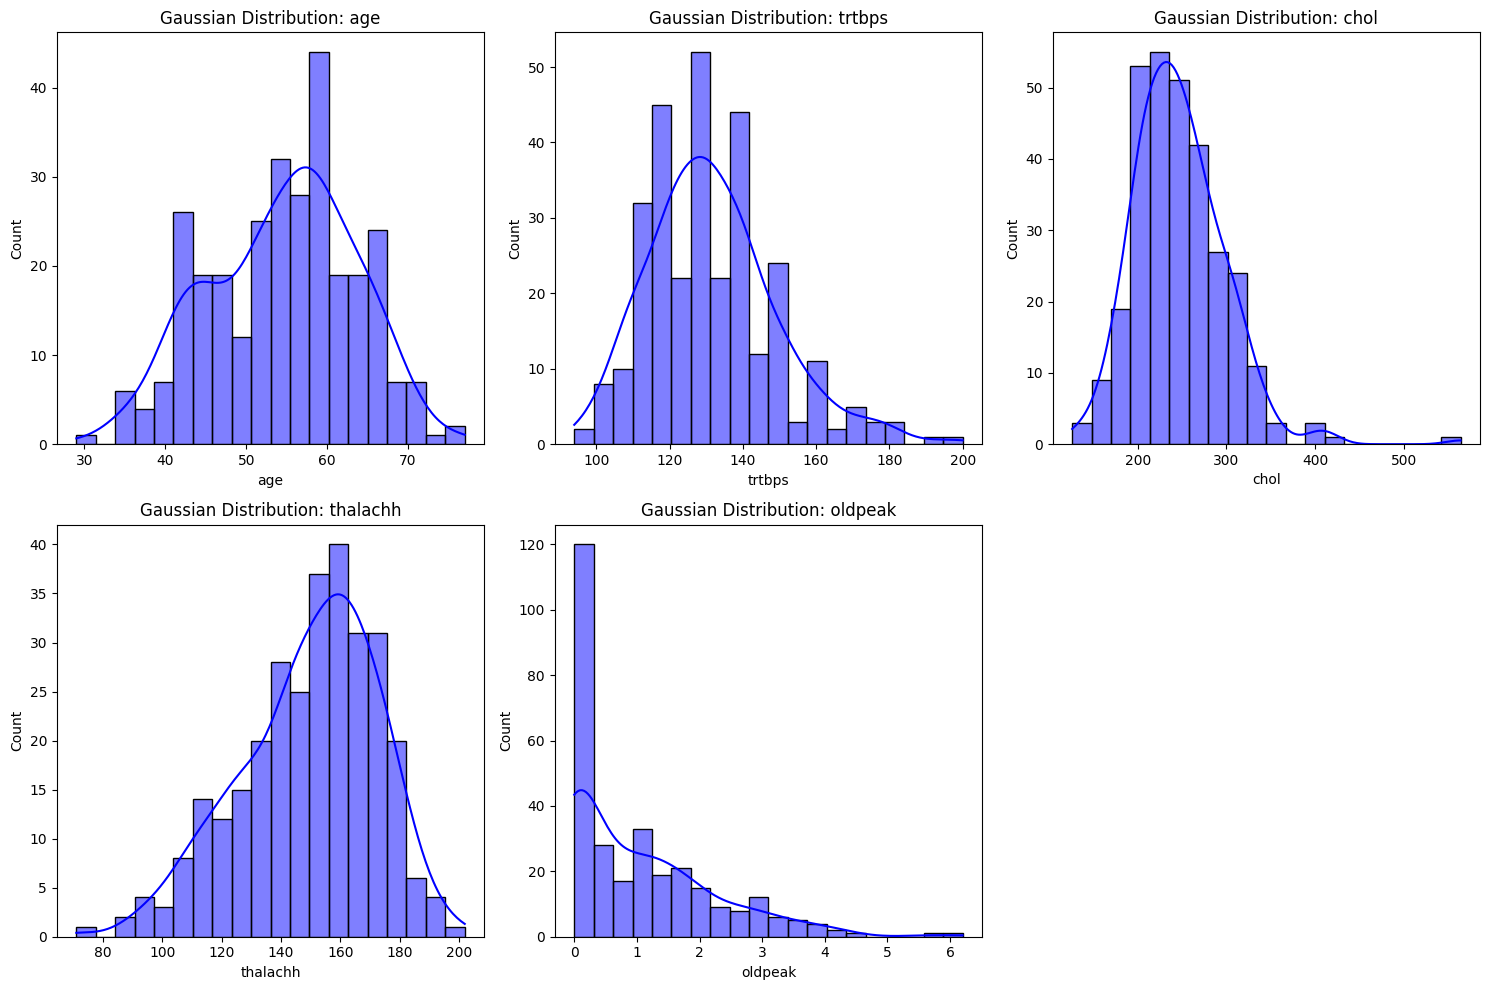

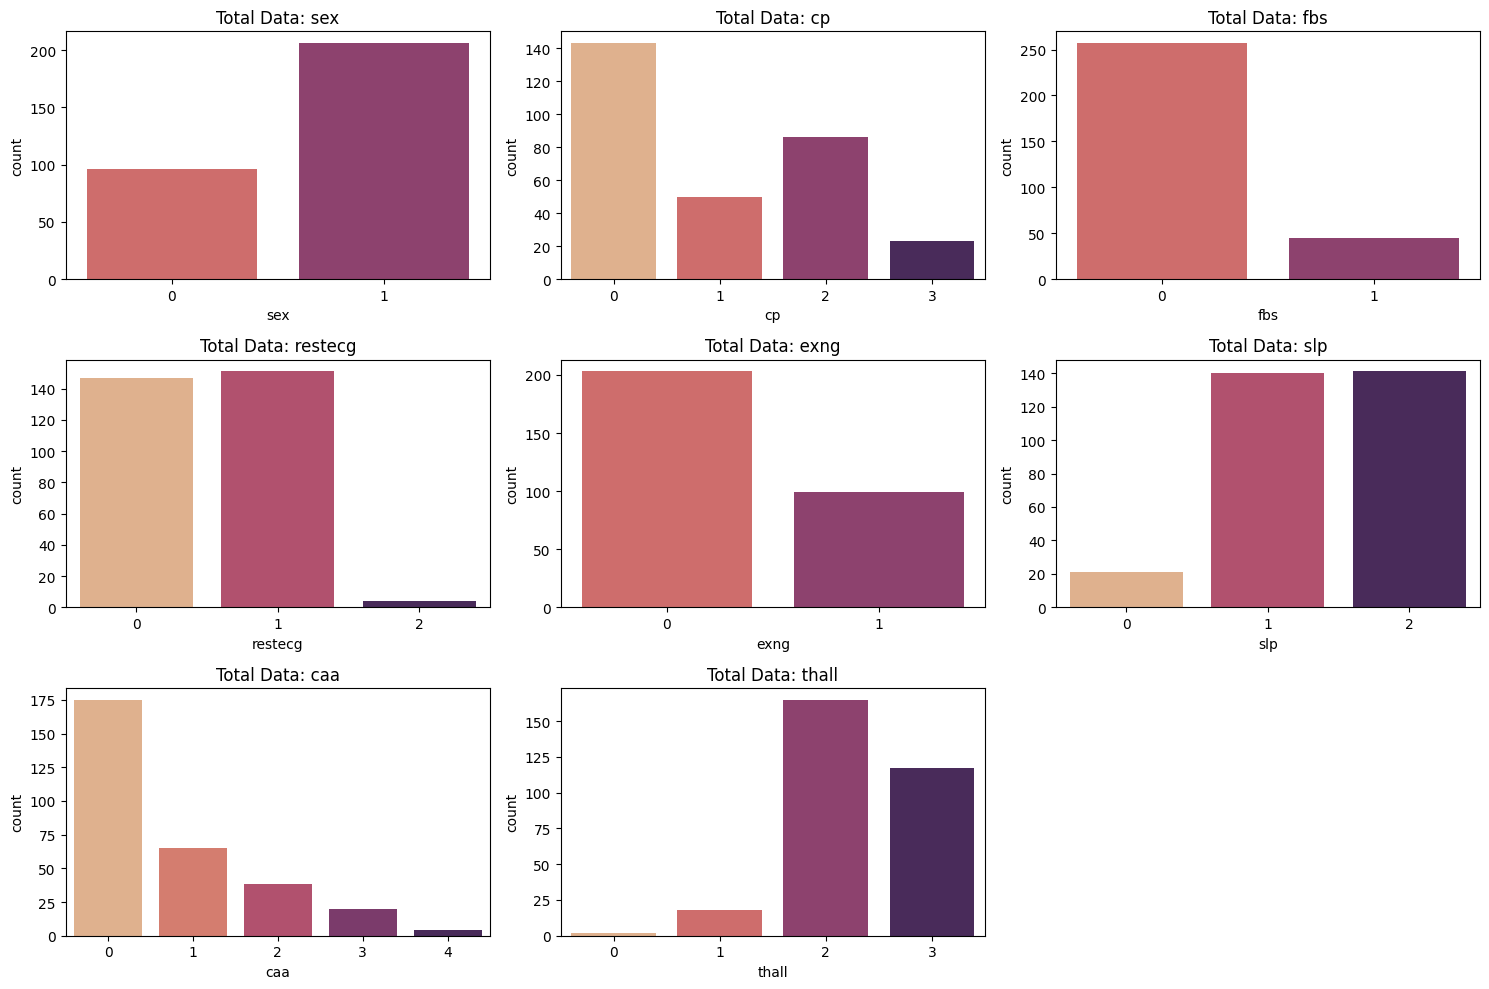

In [23]:
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# 1. Numeric Visualization (Check Data Distribution Bell)
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='blue', bins=20)
    plt.title(f'Gaussian Distribution: {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# 2. Categorical Visualization (Check Data Balance)
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue=col, legend=False, palette='flare')
    plt.title(f'Total Data: {col}')
plt.tight_layout()
plt.show()

### C.2 Bivariate Analysis

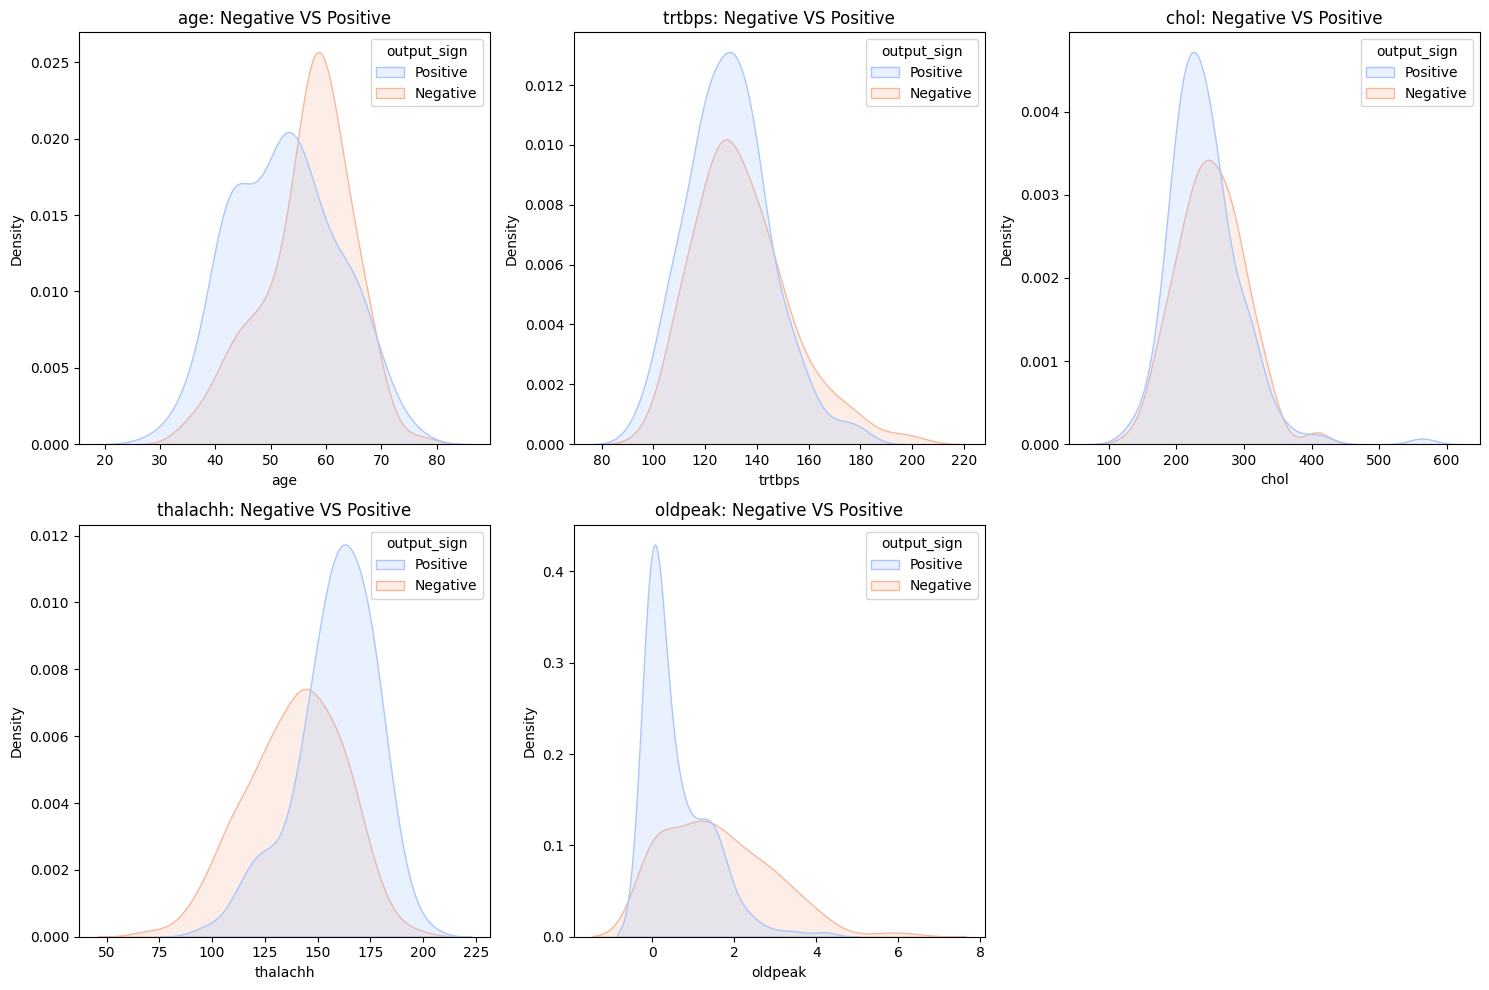

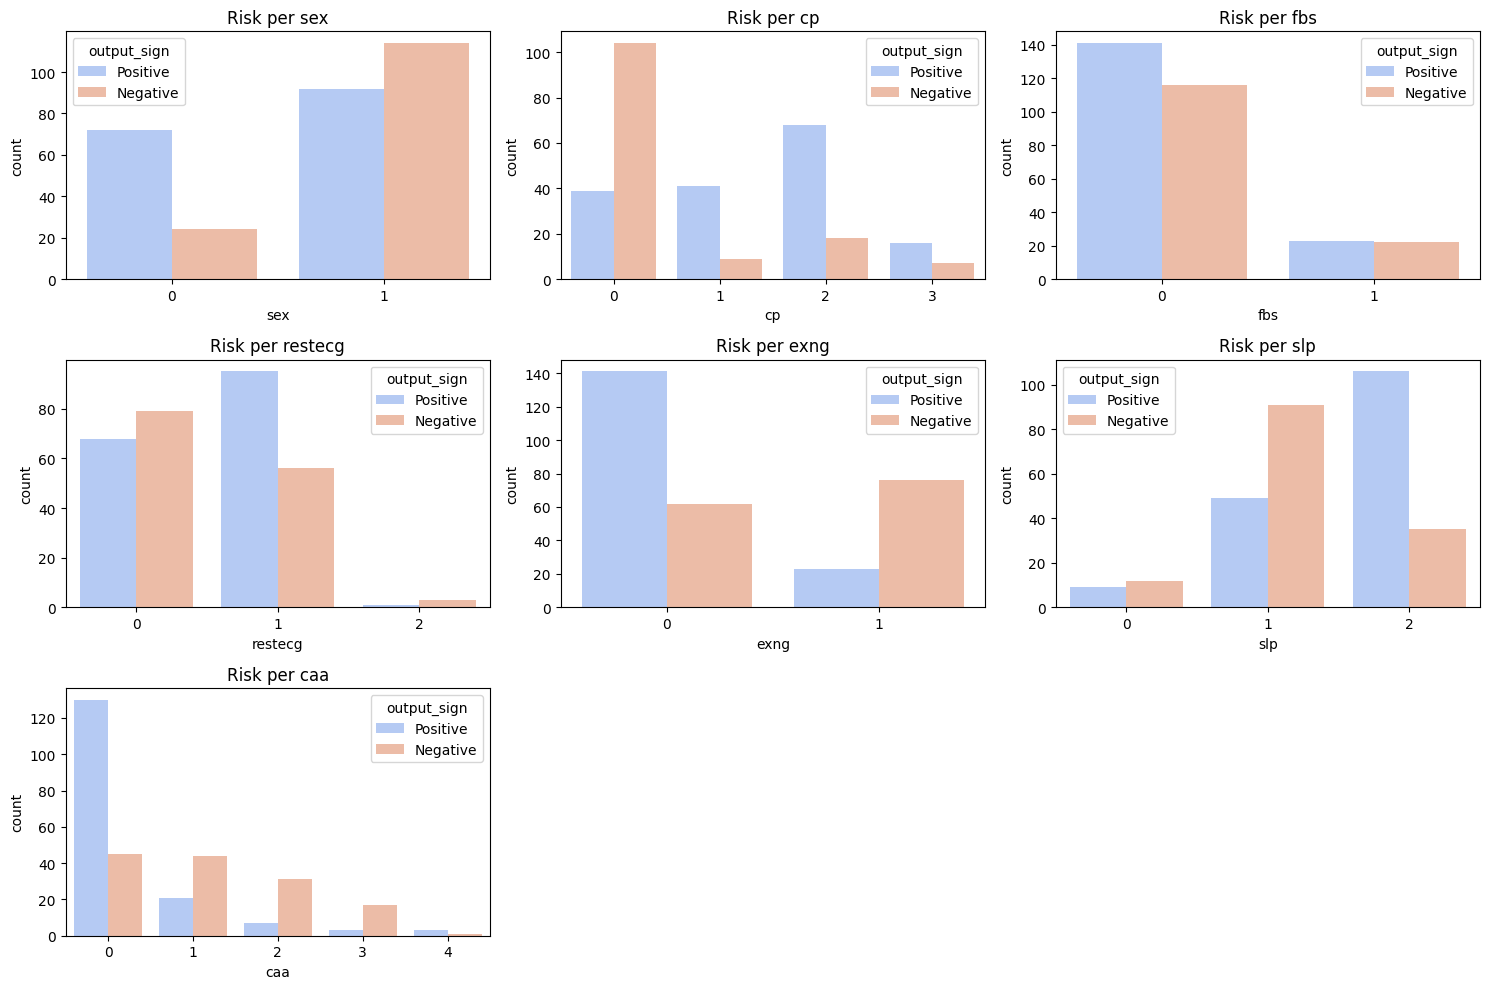

In [28]:
# 1. Numeric vs Target (The "Gaussian Clash")
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=df, x=col, hue='output_sign', fill=True, palette='coolwarm')
    plt.title(f'{col}: Negative VS Positive')
plt.tight_layout()
plt.show()

# 2. Categoric vs Target
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols[:-1]):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue='output_sign', palette='coolwarm')
    plt.title(f'Risk per {col}')
plt.tight_layout()
plt.show()

### C.3 Multivariate Analysis

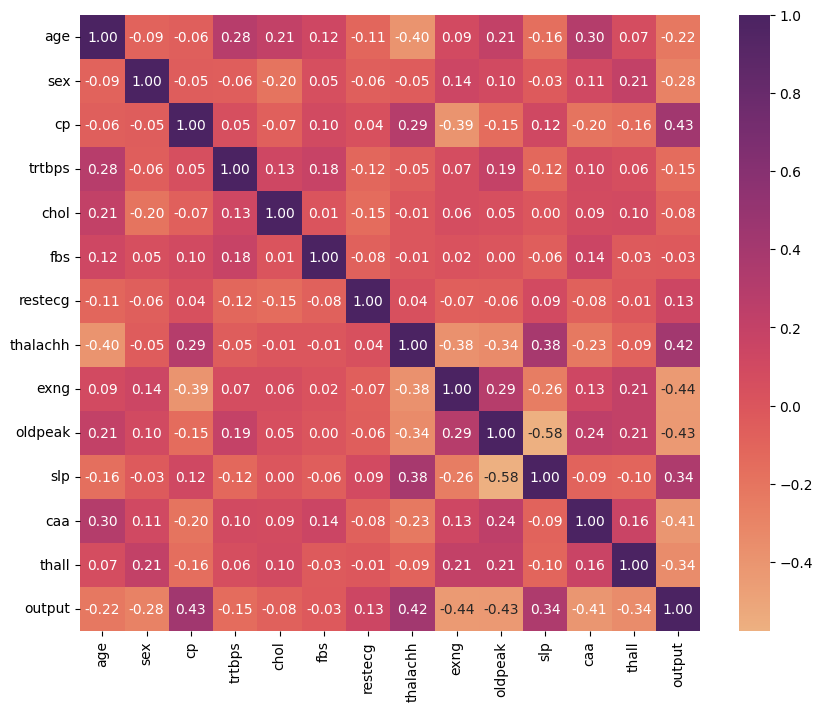

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare', fmt='.2f')
plt.show()

## D. Modelling

## E. Evaluation

## F. GUI